In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import explore

import sklearn.preprocessing
from sklearn.cluster import KMeans

seed = 21

In [2]:
df = acquire.get_wine()

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
df.color.value_counts()

AttributeError: 'DataFrame' object has no attribute 'color'

In [ ]:
df.quality.value_counts()

### There are 2339 rows with outliers out of a total of 6497 rows, for now we will keep outliers

In [5]:
train, X_train, y_train, X_val, y_val, X_test, y_test = explore.split_data(df,'quality')

In [6]:
X_train_s,X_val_s,X_test_s = explore.scale_minmax(X_train,X_val,X_test)

In [7]:
X_train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0


In [8]:
x = X_train[['alcohol','residual sugar']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.predict(x)

KeyError: "['residual sugar'] not in index"

In [ ]:
kmeans.predict(X_val[['alcohol','residual sugar']])

In [ ]:
explore.plot_inertia(x)

In [9]:
X_train['cluster'] = kmeans.predict(x)

NameError: name 'kmeans' is not defined

In [10]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue='cluster')

ValueError: Could not interpret value `cluster` for parameter `hue`

In [ ]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue=X_train.cluster)

<AxesSubplot:>

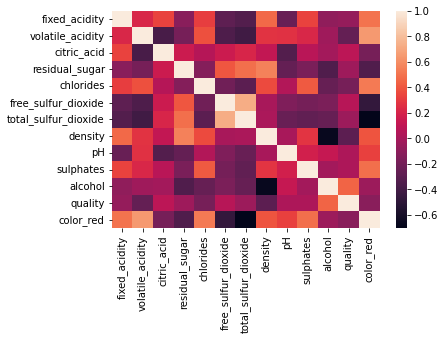

In [11]:
sns.heatmap(train.corr())

In [12]:
train.corr()['quality'].sort_values()

density                -0.295093
volatile_acidity       -0.262734
chlorides              -0.190204
color_red              -0.114737
fixed_acidity          -0.068270
total_sulfur_dioxide   -0.042280
residual_sugar         -0.036281
sulphates               0.024885
pH                      0.025294
free_sulfur_dioxide     0.062642
citric_acid             0.085020
alcohol                 0.441490
quality                 1.000000
Name: quality, dtype: float64

In [13]:
explore.plot_clusters(X_train_s,'alcohol','density','volatile acidity')

KeyError: "['volatile acidity'] not in index"

In [14]:
X_train_s,X_val_s,X_test= explore.cluster_Xsets(X_train_s,X_val_s,X_test,
                                        ['alcohol','density','volatile acidity','chlorides'])

KeyError: "['volatile acidity'] not in index"

In [15]:
X_train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0


In [16]:
X_train_s.cluster.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cluster'

The proportion of acid to (alcohol + sugar) affects quality   
The proportion of acid to chlorides affects quality

In [17]:
def acid_alcohol_proportion(df):
    df['acid_alc_sugar']=(df['fixed acidity']+df['volatile acidity']+df['citric acid']/3)/(df['alcohol']+df['residual sugar']/2)
    df['acid_chlor'] = (df['fixed acidity']+df['volatile acidity']+df['citric acid']/3)/df['chlorides']
    return df

In [18]:
X_train_s = acid_alcohol_proportion(X_train_s)

KeyError: 'fixed acidity'

In [ ]:
X_train_s